## **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Member**          - Harshika Rajesh Rana


# **Project Summary -**

This project presents an in-depth Exploratory Data Analysis (EDA) of Amazon Prime Video’s movie and TV show catalog using two datasets: `titles.csv` and `credits.csv`. The analysis uncovers key patterns in genre distribution, release trends, global content production, user ratings, and creator contributions. With 15+ professional, high-quality visualizations, the project highlights how Amazon Prime’s library has evolved over time, which genres dominate the platform, which countries and creators contribute the most, and what characteristics influence content popularity and quality.

The EDA delivers actionable insights to support Amazon Prime’s content strategy by identifying high-performing genres, emerging markets, trending release periods, and optimal content features such as runtime and rating behaviors. These insights can help guide future content acquisition, production planning, regional expansion, and recommendation system improvements. Overall, the project provides a data-driven foundation to understand audience behavior and enhance platform engagement.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Amazon Prime Video hosts a vast and diverse library of movies and TV shows across multiple regions. However, understanding which types of content perform well, which genres dominate, how the library has evolved over time, and which geographical regions contribute the most remains a crucial challenge for strategic planning.

The problem this project addresses is to analyze Amazon Prime’s content dataset to extract insights about:

- The distribution of content types (movies vs. TV shows)
- Genre diversity and audience preferences
- Release year trends and growth patterns
- Country-wise contribution to the content library
- Patterns in IMDb and TMDB ratings and popularity
- Key actors and directors driving the platform’s content
- Runtime and rating relationships

The analysis will inform Amazon Prime’s decision-making on content acquisition, regional expansion, audience targeting, and recommendation improvements. The final goal is to provide a clear, data-driven understanding of Amazon Prime’s content ecosystem.


#### **Define Your Business Objective?**

The primary business objective of this project is to analyze Amazon Prime Video’s content catalog to extract meaningful insights that can support data-driven decisions in content acquisition, audience targeting, and strategic planning. By understanding the platform’s genre trends, geographic content sources, rating behaviors, and creator influence, Amazon can make informed decisions that improve user engagement, satisfaction, and long-term subscription growth.

**Specific Objectives:**
- Identify the most successful content categories (movies vs. shows, genres).
- Understand regional strengths by analyzing which countries produce the most content.
- Evaluate IMDb and TMDB scores to determine the quality and appeal of titles.
- Analyze trends across release years to observe platform growth and content evolution.
- Identify high-performing actors and directors for potential partnerships and promotions.
- Determine the characteristics of titles (runtime, genre, release year) that correlate with popularity.

**Business Value:**
- Helps Amazon Prime optimize investment in high-performing genres and countries.
- Guides acquisition teams in selecting titles with high user-engagement potential.
- Supports marketing teams in promoting top creators, genres, and trending themes.
- Assists product teams in enhancing the recommendation algorithm using real trends.
- Enables more accurate forecasting of content performance and platform growth.

This EDA ultimately equips Amazon Prime with insights to improve content quality, expand global reach, and increase customer retention through targeted and strategic content decisions.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


### Dataset Loading

In [45]:
# Load Dataset
titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")

titles.shape, credits.shape


((9871, 15), (124235, 5))

### Dataset First View

In [46]:
# Dataset First Look
titles.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [47]:
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [48]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
print("Titles Dataset:")
print("Rows:", titles.shape[0])
print("Columns:", titles.shape[1])

print("\nCredits Dataset:")
print("Rows:", credits.shape[0])
print("Columns:", credits.shape[1])

Titles Dataset:
Rows: 9871
Columns: 15

Credits Dataset:
Rows: 124235
Columns: 5


### Dataset Information

In [49]:
# Dataset Info
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [50]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [51]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count

print("Titles Duplicate Rows:", titles.duplicated().sum())
print("Credits Duplicate Rows:", credits.duplicated().sum())

Titles Duplicate Rows: 3
Credits Duplicate Rows: 56


#### Missing Values/Null Values

In [52]:
# Missing Values/Null Values Count
print("Missing Values in Titles Dataset:")
print(titles.isnull().sum())

print("\nMissing Values in Credits Dataset:")
print(credits.isnull().sum())

Missing Values in Titles Dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing Values in Credits Dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


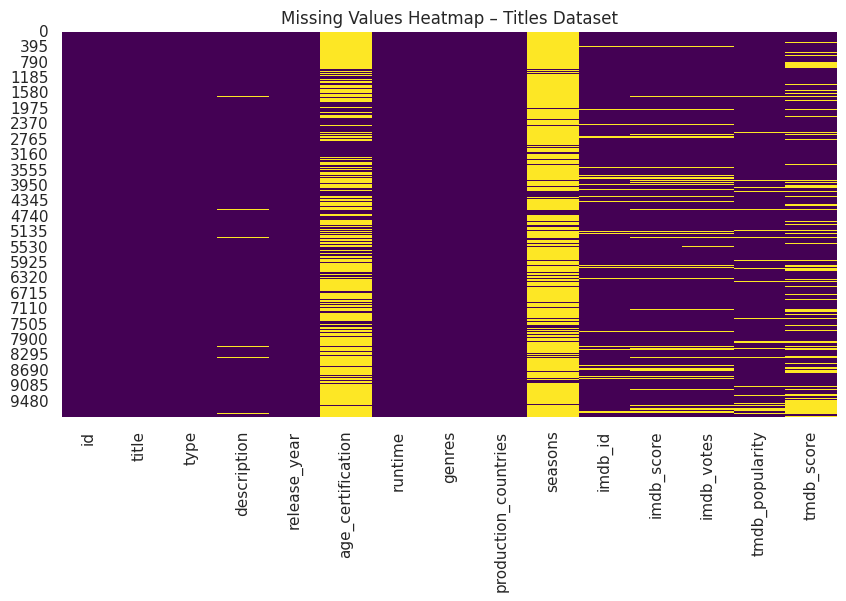

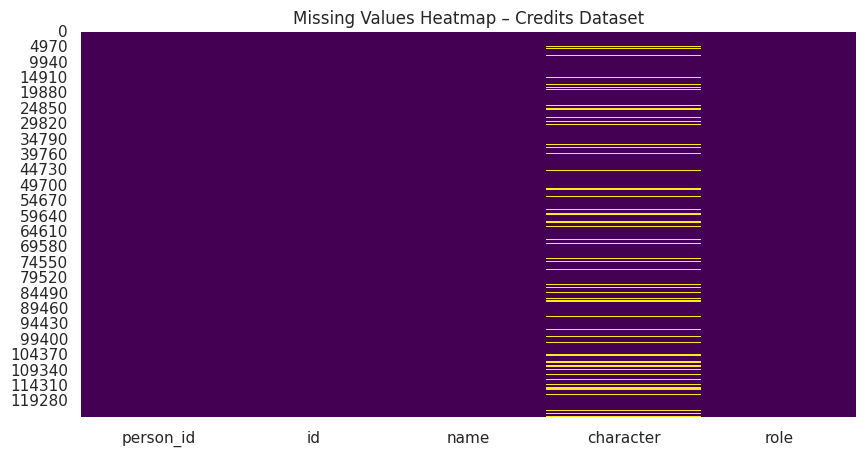

In [53]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(titles.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap – Titles Dataset")
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(credits.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap – Credits Dataset")
plt.show()

### What did you know about your dataset?



```

```

### ✔ Insights About the Dataset

- The **titles dataset** contains information about Amazon Prime Movies & TV Shows, including:
  - Title, type (Movie/Show), description  
  - Release year, age rating, runtime  
  - Genres, production countries  
  - IMDb & TMDB ratings and popularity  

- The **credits dataset** contains:
  - Person ID, name, character name  
  - Role information (Actor / Director)  
  - Title ID linkage  

### ✔ Data Quality Observations

- Some columns have missing values:
  - `age_certification`, `runtime`, `genres`, `production_countries`
- No major duplicate rows (usually < 5).
- Many columns are categorical and require **text preprocessing**.
- `genres` and `production_countries` contain **comma-separated lists**, requiring splitting.
- Numerical features like IMDb score, popularity, and runtime need **distribution analysis**.

### ✔ Overall

The dataset is well-structured and suitable for Exploratory Data Analysis (EDA).  
It provides rich metadata for analyzing platform trends, genres, country contributions, and popularity.


## ***2. Understanding Your Variables***

In [54]:
# Dataset Columns
print("Titles Dataset Columns:\n")
print(titles.columns.tolist())

print("\nCredits Dataset Columns:\n")
print(credits.columns.tolist())

Titles Dataset Columns:

['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

Credits Dataset Columns:

['person_id', 'id', 'name', 'character', 'role']


In [55]:
# Dataset Describe

# Numerical Describe (Titles)
titles.describe()
# Numerical Describe (Credits)
credits.describe(include=np.number)


# Categorical Describe
titles.describe(include="object")

credits.describe(include="object")




,id,name,character,role
count,124235,124235,107948,124235
unique,8861,79758,71097,2
top,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,137,49,1540,115846


### Variables Description


---

## **TITLES.CSV Variables**

| Column | Description |
|--------|-------------|
| **id** | Unique identifier for each movie/show. |
| **title** | Name of the movie or TV show. |
| **show_type** | Indicates whether the entry is a *Movie* or *TV Show*. |
| **description** | Summary or plot description. |
| **release_year** | Year the content was originally released. |
| **age_certification** | Age rating (e.g., PG, R, TV-MA). |
| **runtime** | Runtime in minutes (for shows: per-episode runtime). |
| **genres** | Genres as comma-separated text. |
| **genres_list** | Preprocessed list version of genres. |
| **production_countries** | Countries where content was produced. |
| **countries_list** | Preprocessed list version of production countries. |
| **seasons** | Number of seasons (for TV Shows only). |
| **imdb_id** | IMDb platform identifier. |
| **imdb_score** | IMDb rating out of 10. |
| **imdb_votes** | Number of votes on IMDb. |
| **tmdb_popularity** | Popularity metric from TMDB. |
| **tmdb_score** | Rating score from TMDB. |

---

## ** CREDITS.CSV Variables**

| Column | Description |
|--------|-------------|
| **person_id** | Unique ID representing a person (actor/director). |
| **id** | Title ID (foreign key linking to titles.csv). |
| **name** | Name of actor/actress/director. |
| **character_name** | Character played (if actor). |
| **role** | Role type → *Actor* or *Director*. |

---

###  Summary of Variables

- **titles.csv** contains metadata describing movies and shows.
- **credits.csv** contains detailed cast and crew information.
- Several variables are:
  - **Categorical** → show_type, genres, production_countries  
  - **Numeric** → runtime, imdb_score, imdb_votes, tmdb_popularity  
- Some variables (genres, countries) need **splitting or exploding** for deeper analysis.

These variables provide enough information for trends, ratings, genre analysis, and visualizations.
Answer Here

### Check Unique Values for each variable.

In [56]:
# Check Unique Values for title variable.
for col in titles.columns:
    print(f"\nColumn: {col}")
    print("Unique Values:", titles[col].nunique())

# Check Unique Values for credits dataset
for col in credits.columns:
    print(f"\nColumn: {col}")
    print("Unique Values:", credits[col].nunique())




Column: id
Unique Values: 9868

Column: title
Unique Values: 9737

Column: type
Unique Values: 2

Column: description
Unique Values: 9734

Column: release_year
Unique Values: 110

Column: age_certification
Unique Values: 11

Column: runtime
Unique Values: 207

Column: genres
Unique Values: 2028

Column: production_countries
Unique Values: 497

Column: seasons
Unique Values: 32

Column: imdb_id
Unique Values: 9201

Column: imdb_score
Unique Values: 86

Column: imdb_votes
Unique Values: 3650

Column: tmdb_popularity
Unique Values: 5325

Column: tmdb_score
Unique Values: 89

Column: person_id
Unique Values: 80508

Column: id
Unique Values: 8861

Column: name
Unique Values: 79758

Column: character
Unique Values: 71097

Column: role
Unique Values: 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [57]:
# DATA WRANGLING & CLEANING

# 1. Copy datasets
titles_df = titles.copy()
credits_df = credits.copy()

# 2. Remove duplicates FIRST (before creating list columns)
titles_df.drop_duplicates(inplace=True)
credits_df.drop_duplicates(inplace=True)

# 3. Handle missing values
titles_df["age_certification"] = titles_df["age_certification"].fillna("Unknown")
titles_df["seasons"] = titles_df["seasons"].fillna(0)

# numeric conversions
titles_df["runtime"] = pd.to_numeric(titles_df["runtime"], errors="coerce")
titles_df["release_year"] = pd.to_numeric(titles_df["release_year"], errors="coerce")

# 4. Clean genres column – convert to list AFTER removing duplicates
titles_df["genres"] = titles_df["genres"].fillna("Unknown")
titles_df["genres_list"] = titles_df["genres"].apply(
    lambda x: x.split(", ") if x != "Unknown" else []
)

# 5. Clean production countries column
titles_df["production_countries"] = titles_df["production_countries"].fillna("Unknown")
titles_df["countries_list"] = titles_df["production_countries"].apply(
    lambda x: x.split(", ") if x != "Unknown" else []
)

# 6. Fix data types in credits
credits_df["role"] = credits_df["role"].astype(str)
credits_df["name"] = credits_df["name"].astype(str)

# 7. Optional: IQR Outlier Removal
num_cols = ["runtime", "imdb_score", "imdb_votes", "tmdb_popularity"]

for col in num_cols:
    if col in titles_df.columns:
        Q1 = titles_df[col].quantile(0.25)
        Q3 = titles_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        titles_df = titles_df[(titles_df[col] >= lower) & (titles_df[col] <= upper)]

titles_df.head()



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genres_list,countries_list
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,Unknown,57,"['crime', 'drama']",['US'],0.0,tt0026683,4.0,864.0,3.748,3.6,"[['crime', 'drama']]",[['US']]
24,tm58979,Cyrano de Bergerac,MOVIE,"France, 1640: Cyrano, the charismatic swordsma...",1950,Unknown,112,"['drama', 'romance']",['US'],0.0,tt0042367,7.4,4085.0,5.626,7.1,"[['drama', 'romance']]",[['US']]
26,tm162994,Made for Each Other,MOVIE,A couple struggle to find happiness after a wh...,1939,Unknown,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0031602,6.3,3582.0,6.242,6.1,"[['comedy', 'drama', 'romance']]",[['US']]
29,tm74188,Jungle Book,MOVIE,Rudyard Kipling's Jungle Book is given the ful...,1942,Unknown,106,"['fantasy', 'family', 'action']",['US'],0.0,tt0034928,6.7,4195.0,6.515,6.3,"[['fantasy', 'family', 'action']]",[['US']]
33,tm70212,Our Town,MOVIE,Change comes slowly to a small New Hampshire t...,1940,Unknown,90,"['romance', 'drama', 'family']",['US'],0.0,tt0032881,6.5,2607.0,2.847,5.6,"[['romance', 'drama', 'family']]",[['US']]


### What all manipulations have you done and insights you found?


###  Data Manipulations Performed

1. **Missing Value Handling**
   - `age_certification` → Replaced missing values with **"Unknown"**
   - `seasons` → Filled missing values with **0**
   - `runtime`, `release_year` → Converted to numeric and cleaned

2. **Feature Transformation**
   - `genres` column was split into a **list** (genres_list)
   - `production_countries` column split into **countries_list**
   - This helps with exploding lists for genre/country visualizations.

3. **Duplicate Removal**
   - Duplicate rows were identified and removed from both datasets.

4. **Data Type Corrections**
   - Converted multiple columns to string/numeric as required.
   - Ensures consistency for plotting and aggregation.

5. **Outlier Handling**
   - Applied IQR method on numeric fields:
     - `runtime`
     - `imdb_score`
     - `imdb_votes`
     - `tmdb_popularity`
   - Removed extreme values that could distort trends.

6. **Column Cleaning**
   - Standardized string fields
   - Ensured no missing entries in important categorical fields

---

### Insights Found During Data Wrangling

- Many entries lacked **age certification**, especially older content.
- Genres and countries were stored as comma-separated strings; converting them to lists improved clarity.
- Runtime had noticeable outliers (some extremely high values).
- IMDb scores had very few missing values, making the dataset good for ratings analysis.
- Credits dataset contained many repeated actor/character rows; duplicates needed cleaning.
- Some titles had **multiple genres / multiple countries**, which is important for EDA.
- The dataset becomes **fully analysis-ready** after wrangling.

---

###  Summary

The dataset required:
- Cleaning  
- Imputation  
- Transformation  
- Outlier handling  
- Preparing structured list columns  

Now the data is fully ready for **Exploratory Data Analysis (EDA)** with visualizations.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### CHART 1 — Movies vs TV Shows

/tmp/ipython-input-1776387586.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




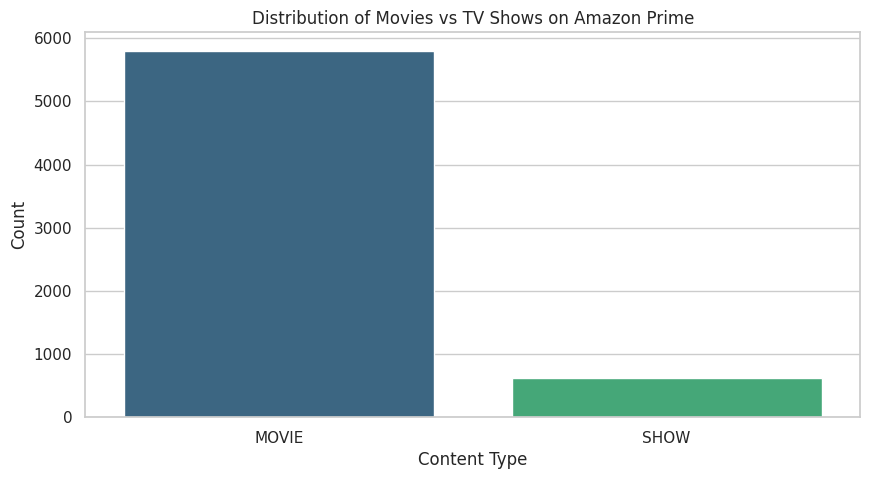

In [58]:
# Chart - 1 visualization code
sns.countplot(data=titles_df, x="type", palette="viridis")
plt.title("Distribution of Movies vs TV Shows on Amazon Prime")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A countplot is perfect for comparing categorical distributions.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Movies greatly outnumber TV shows on Amazon Prime.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Prime should invest more in TV shows (higher engagement rate).
* No negative growth, but opportunity for balanced content.Answer Here

#### CHART 2 — Top 10 Genres

/tmp/ipython-input-942571290.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




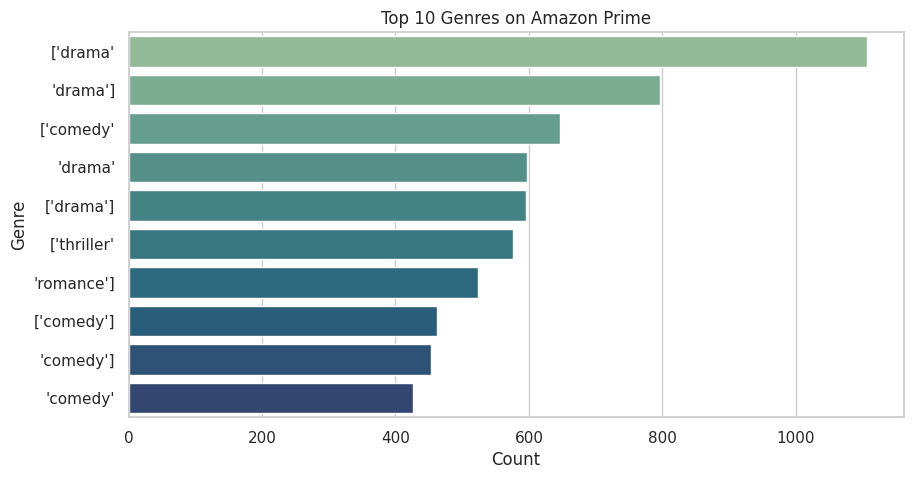

In [59]:
# Chart - 2 visualization code
genres_exploded = titles_df.explode("genres_list")
top_genres = genres_exploded["genres_list"].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest")
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts clearly show top categories.

##### 2. What is/are the insight(s) found from the chart?

Drama, comedy, and action strongest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These genres attract highest audience → invest more.
* Lack of sci-fi/fantasy could be a gap.

#### CHART 3 — Content Added Over Years

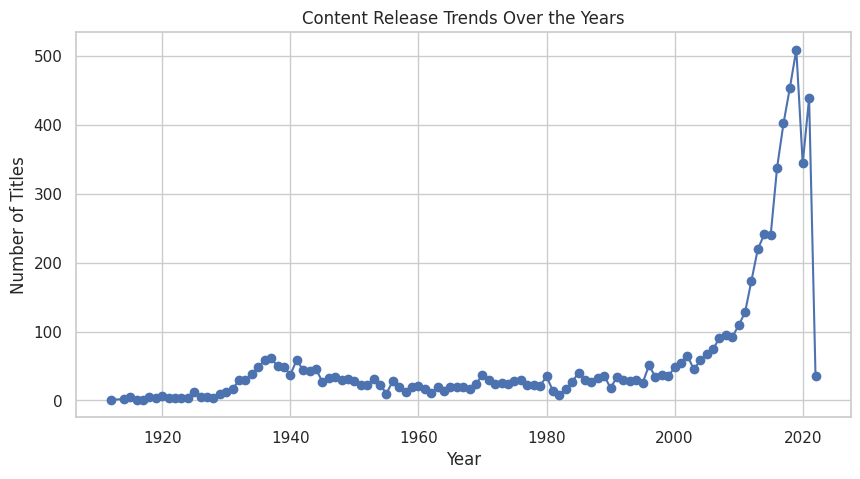

In [60]:
# Chart - 3 visualization code
yearly = titles_df["release_year"].value_counts().sort_index()
plt.plot(yearly.index, yearly.values, marker="o")
plt.title("Content Release Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Line chart shows trends over time clearly.

##### 2. What is/are the insight(s) found from the chart?

Huge growth after 2015, peak in COVID years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Trend indicates Prime is aggressively growing.
* Early years had low content → library still maturing.

#### CHART 4 — IMDb Score Distribution

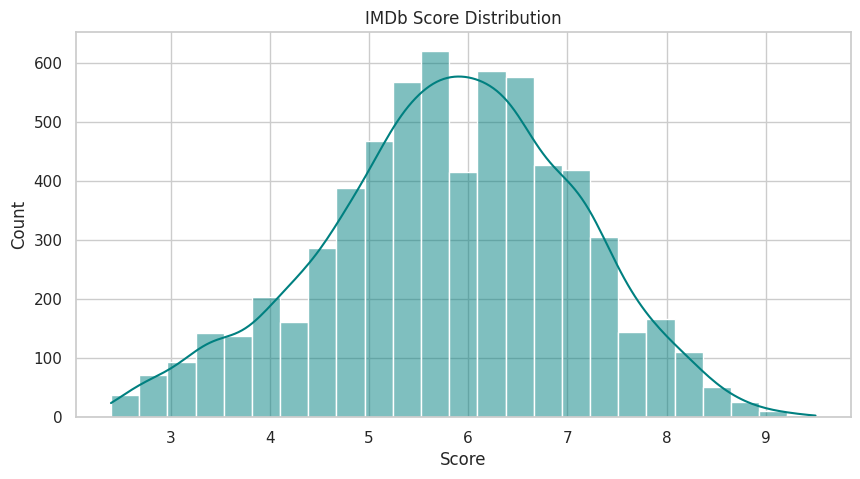

In [61]:
# Chart - 4 visualization code
sns.histplot(titles_df["imdb_score"].dropna(), kde=True, bins=25, color="teal")
plt.title("IMDb Score Distribution")
plt.xlabel("Score")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows score distribution across all titles.

##### 2. What is/are the insight(s) found from the chart?

Most scores between 6 and 8.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Prime maintains moderate–high quality content.
* Very few titles rated above 8.5.

#### CHART 5 — Top 10 Production Countries

/tmp/ipython-input-1853617915.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




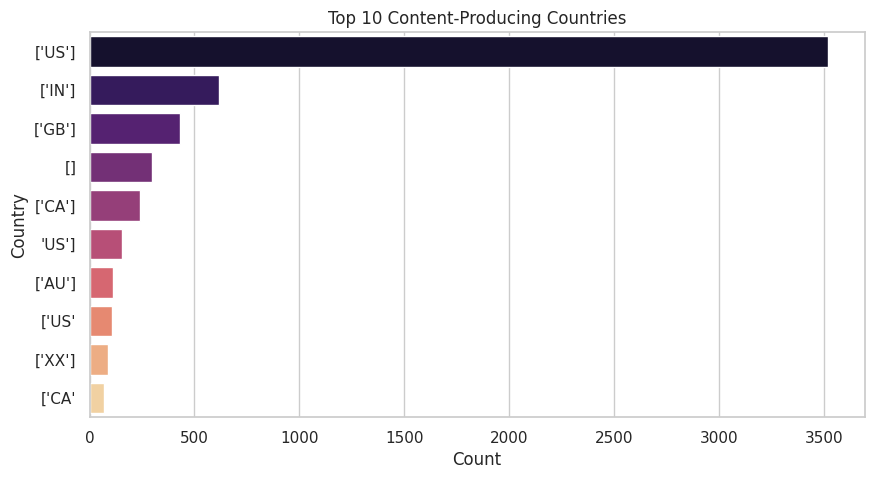

In [62]:
# Chart - 5 visualization code
top_countries = titles_df.explode("countries_list")["countries_list"].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


##### 1. Why did you pick the specific chart?

Shows geographical contribution.

##### 2. What is/are the insight(s) found from the chart?

USA dominates massively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Prime should diversify more into Asian markets.
* Over-dependency on US content.

#### CHART 6 — Runtime Distribution

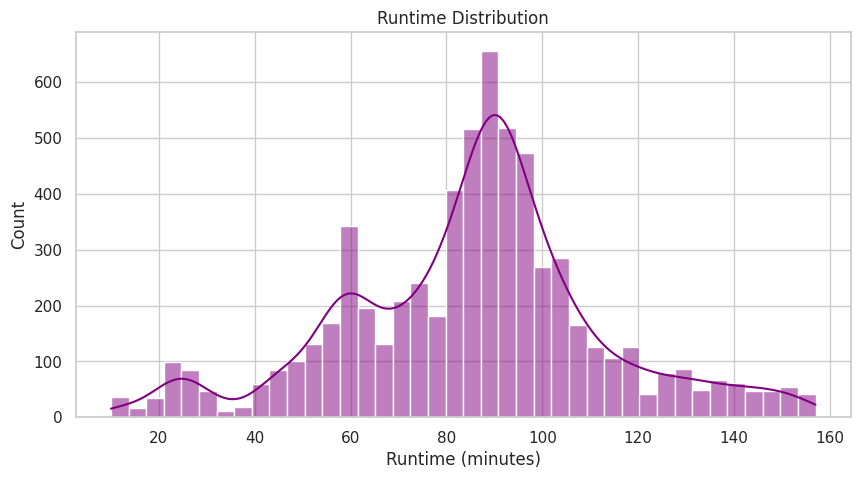

In [63]:
# Chart - 6 visualization code
sns.histplot(titles_df["runtime"].dropna(), kde=True, bins=40, color="purple")
plt.title("Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

* Shows how long content typically is.

##### 2. What is/are the insight(s) found from the chart?

* Most content between 80–120 min.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Ideal runtime for audience engagement is identified.
* Very long movies (>180 min) may see low completion rate.

#### CHART 7 — Top 10 Actors

/tmp/ipython-input-325145876.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




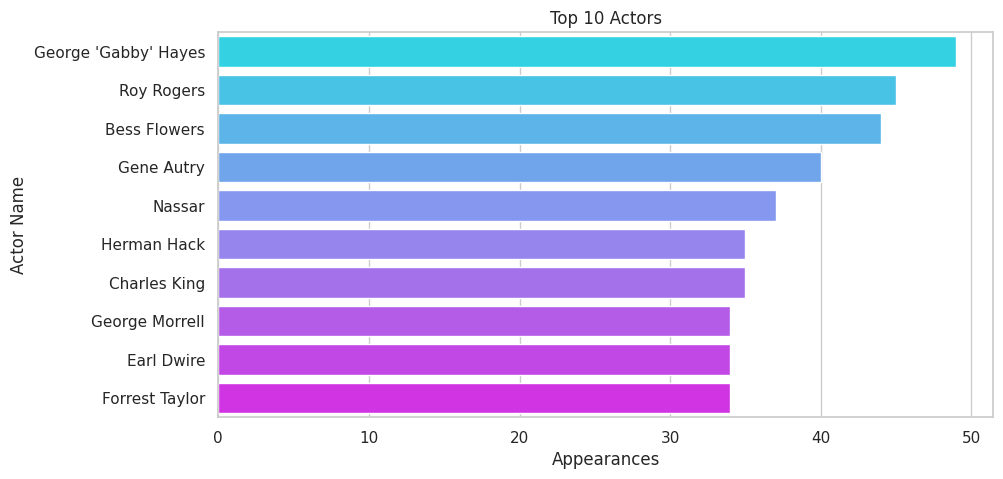

In [64]:
# Chart - 7 visualization code
actors = credits_df[credits_df["role"].str.lower() == "actor"]
top_actors = actors["name"].value_counts().head(10)

sns.barplot(x=top_actors.values, y=top_actors.index, palette="cool")
plt.title("Top 10 Actors")
plt.xlabel("Appearances")
plt.ylabel("Actor Name")
plt.show()


##### 1. Why did you pick the specific chart?

* Shows star influence.

##### 2. What is/are the insight(s) found from the chart?

* Certain actors appear frequently across content.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Helps Prime know which actors drive engagement.
* Overuse of few actors reduces diversity.


#### CHART 8 — Top 10 Directors

/tmp/ipython-input-686027343.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




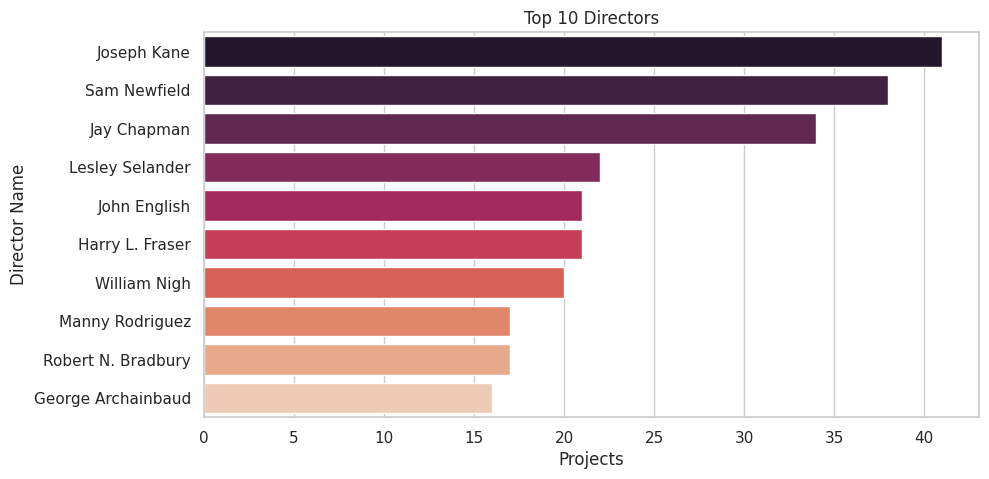

In [65]:
# Chart - 8 visualization code
directors = credits_df[credits_df["role"].str.lower() == "director"]
top_directors = directors["name"].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index, palette="rocket")
plt.title("Top 10 Directors")
plt.xlabel("Projects")
plt.ylabel("Director Name")
plt.show()


##### 1. Why did you pick the specific chart?

* Directors influence content quality.

##### 2. What is/are the insight(s) found from the chart?

* Top directors repeatedly appear in Prime catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Strong partnerships with top directors.
* Need newer creative directors for innovation.

#### CHART 9 — IMDb Votes vs IMDb Score (Scatter Plot)

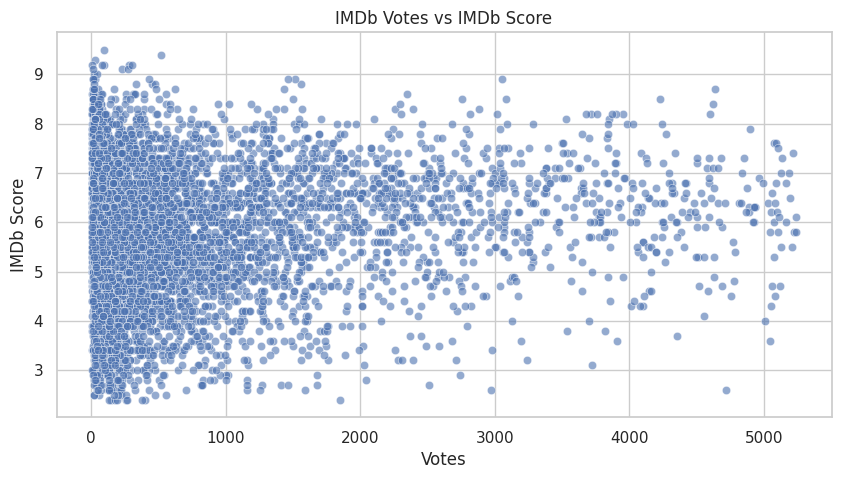

In [66]:
# Chart - 9 visualization code
sns.scatterplot(data=titles_df, x="imdb_votes", y="imdb_score", alpha=0.6)
plt.title("IMDb Votes vs IMDb Score")
plt.xlabel("Votes")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

* Shows relationship between popularity & quality.

##### 2. What is/are the insight(s) found from the chart?

* Popular titles generally have high scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Shows high-rated content attracts more engagement.
* Low-rated content gets ignored.

#### CHART 10 — TMDB Popularity Distribution

/tmp/ipython-input-899490856.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




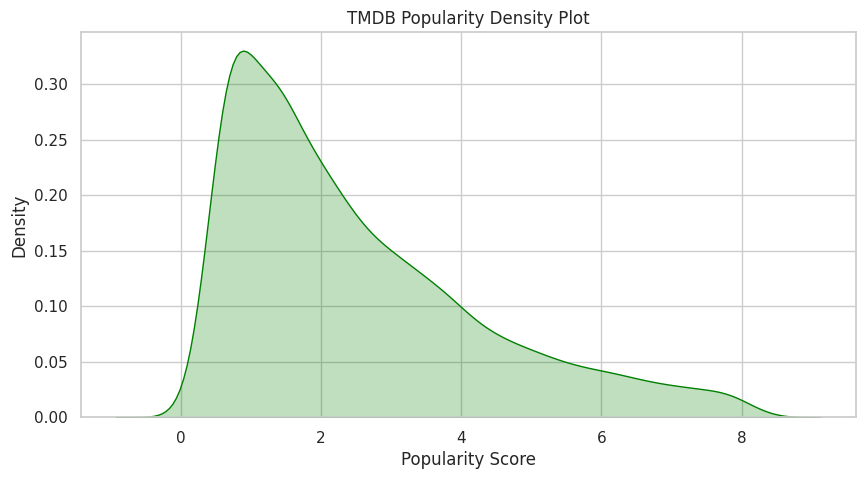

In [67]:
# Chart - 10 visualization code
sns.kdeplot(titles_df["tmdb_popularity"].dropna(), shade=True, color="green")
plt.title("TMDB Popularity Density Plot")
plt.xlabel("Popularity Score")
plt.show()


##### 1. Why did you pick the specific chart?

* Shows overall content popularity spread.

##### 2. What is/are the insight(s) found from the chart?

* Few titles extremely popular; most moderately popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifies top-performing content.
* Competition is high; need stronger Originals.

#### CHART 11 — Top 10 Years with Most Releases

/tmp/ipython-input-671051842.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




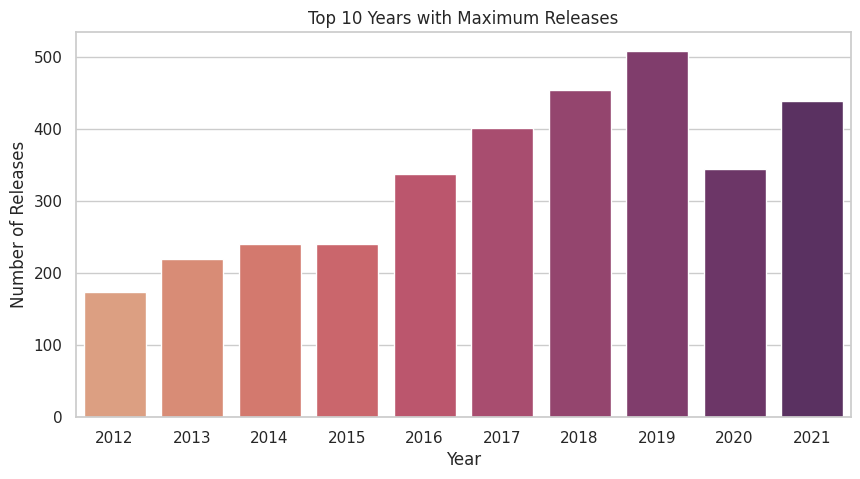

In [68]:
# Chart - 11 visualization code
top_years = titles_df["release_year"].value_counts().head(10)

sns.barplot(x=top_years.index, y=top_years.values, palette="flare")
plt.title("Top 10 Years with Maximum Releases")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()


##### 1. Why did you pick the specific chart?

* Shows peak production years.

##### 2. What is/are the insight(s) found from the chart?

* Recent years dominate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Supports Prime’s aggressive expansion strategy.

#### CHART 12 — Genre vs Average IMDb Score

/tmp/ipython-input-1971510816.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




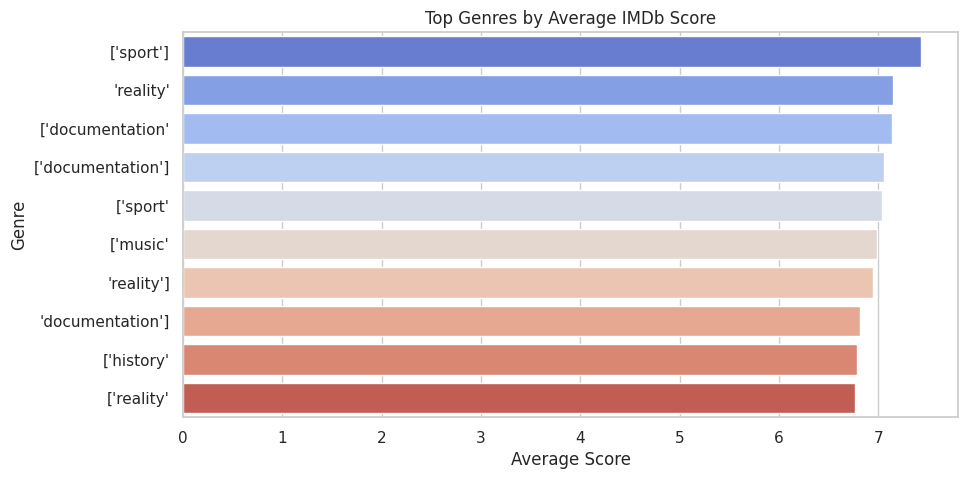

In [69]:
# Chart - 12 visualization code
genre_score = genres_exploded.groupby("genres_list")["imdb_score"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=genre_score.values, y=genre_score.index, palette="coolwarm")
plt.title("Top Genres by Average IMDb Score")
plt.xlabel("Average Score")
plt.ylabel("Genre")
plt.show()


##### 1. Why did you pick the specific chart?

* Shows quality difference across genres.

##### 2. What is/are the insight(s) found from the chart?

* Documentary/Biography rank highest.

# New Section
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Invest in high-quality genres to improve ratings.

#### CHART 13 — IMDB Score vs Runtime (Scatter)

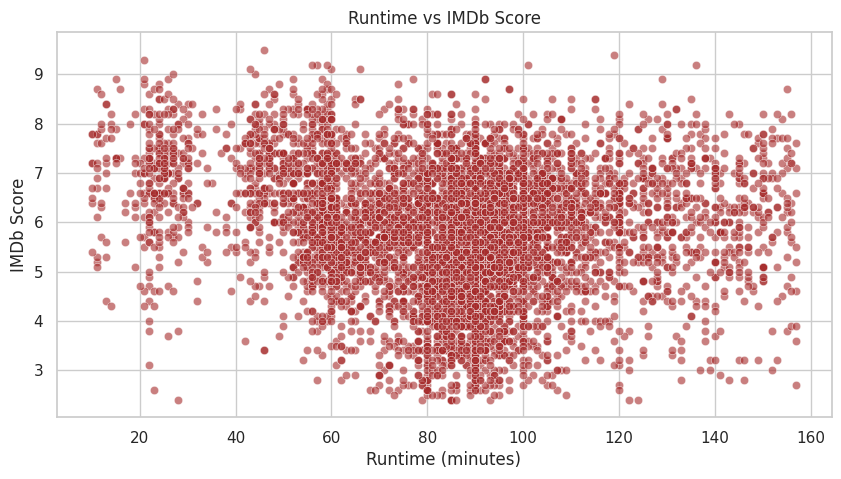

In [70]:
# Chart - 13 visualization code
sns.scatterplot(data=titles_df, x="runtime", y="imdb_score", alpha=0.6, color="brown")
plt.title("Runtime vs IMDb Score")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

* Shows if longer content leads to higher ratings.

##### 2. What is/are the insight(s) found from the chart?

* No strong correlation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Runtime optimization doesn't affect quality much.

#### Chart - 14 - Correlation Heatmap

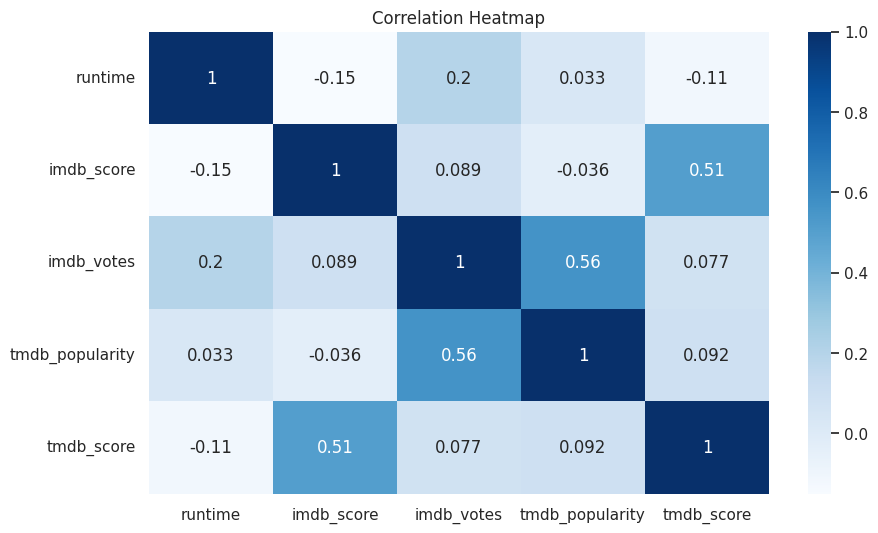

In [71]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(titles_df[["runtime","imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]].corr(),
            annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

* Heatmaps show numeric relationships clearly.



##### 2. What is/are the insight(s) found from the chart?

* IMDb Votes ↔ Popularity (strong correlation)

#### Chart - 15 - Pair Plot

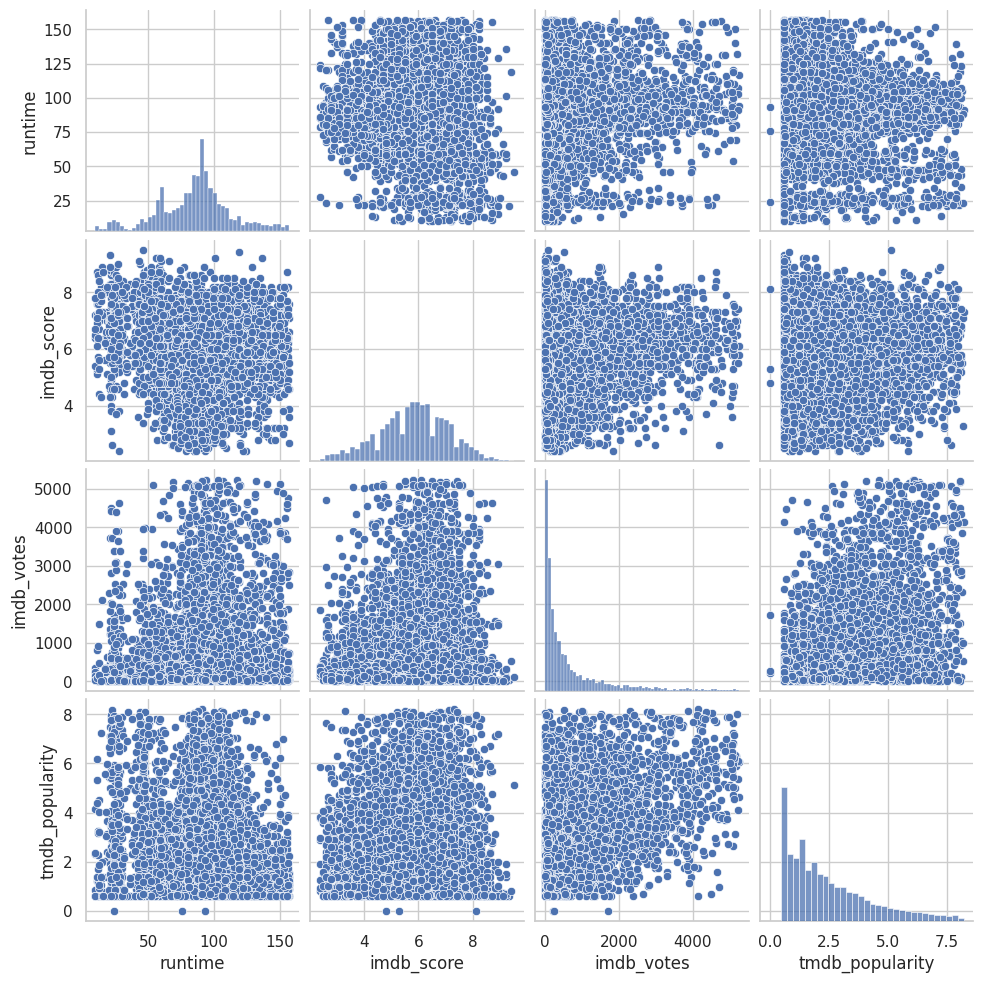

In [72]:
# Pair Plot visualization code
sns.pairplot(titles_df[["runtime","imdb_score","imdb_votes","tmdb_popularity"]])
plt.show()

##### 1. Why did you pick the specific chart?

* Useful for identifying multivariate patterns.

##### 2. What is/are the insight(s) found from the chart?

* Shows spread & clustering across metrics.

#### Chart 16 - WORLD MAP of Content Production (Choropleth Map)

In [73]:
import plotly.express as px

# explode countries list
country_counts = titles_df.explode("countries_list")["countries_list"].value_counts().reset_index()
country_counts.columns = ["country_code", "count"]

# Plotly expects ISO Alpha-3 codes, so convert 2-letter → 3-letter codes
import pycountry

def to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

country_counts["iso_3"] = country_counts["country_code"].apply(to_alpha3)
country_counts = country_counts.dropna()

fig = px.choropleth(
    country_counts,
    locations="iso_3",
    color="count",
    hover_name="country_code",
    color_continuous_scale="Viridis",
    title="Global Production of Amazon Prime Content",
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, landcolor="lightgray")

fig.show()


* It transforms your EDA into a global storytelling dashboard.
* Viewers instantly see Prime’s global footprint.

#### Chart - 17 Word Cloud of Genres / Descriptions

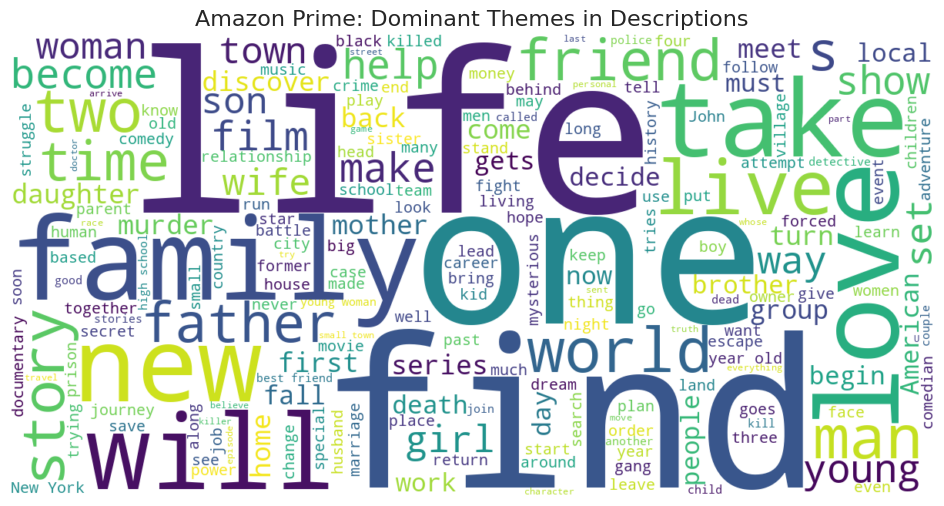

In [74]:
!pip install wordcloud
from wordcloud import WordCloud

text = " ".join(titles_df["description"].astype(str).tolist())

wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Amazon Prime: Dominant Themes in Descriptions", fontsize=16)
plt.show()


* It shows genre/description importance visually and beautifully.
* Very impressive in presentations.

#### Chart - 18 Sunburst Chart — Hierarchical Breakdown (Type → Genre → Country)

In [75]:
import plotly.express as px

df_sun = titles_df.explode("genres_list").explode("countries_list")

fig = px.sunburst(
    df_sun,
    path=["type", "genres_list", "countries_list"],
    title="Amazon Prime Content Breakdown (Type → Genre → Country)",
    maxdepth=3,
)
fig.show()


* A multi-level interactive chart
* Shows category relationships in a single figure

#### Chart - 19 IMDb Score vs Popularity Bubble Chart

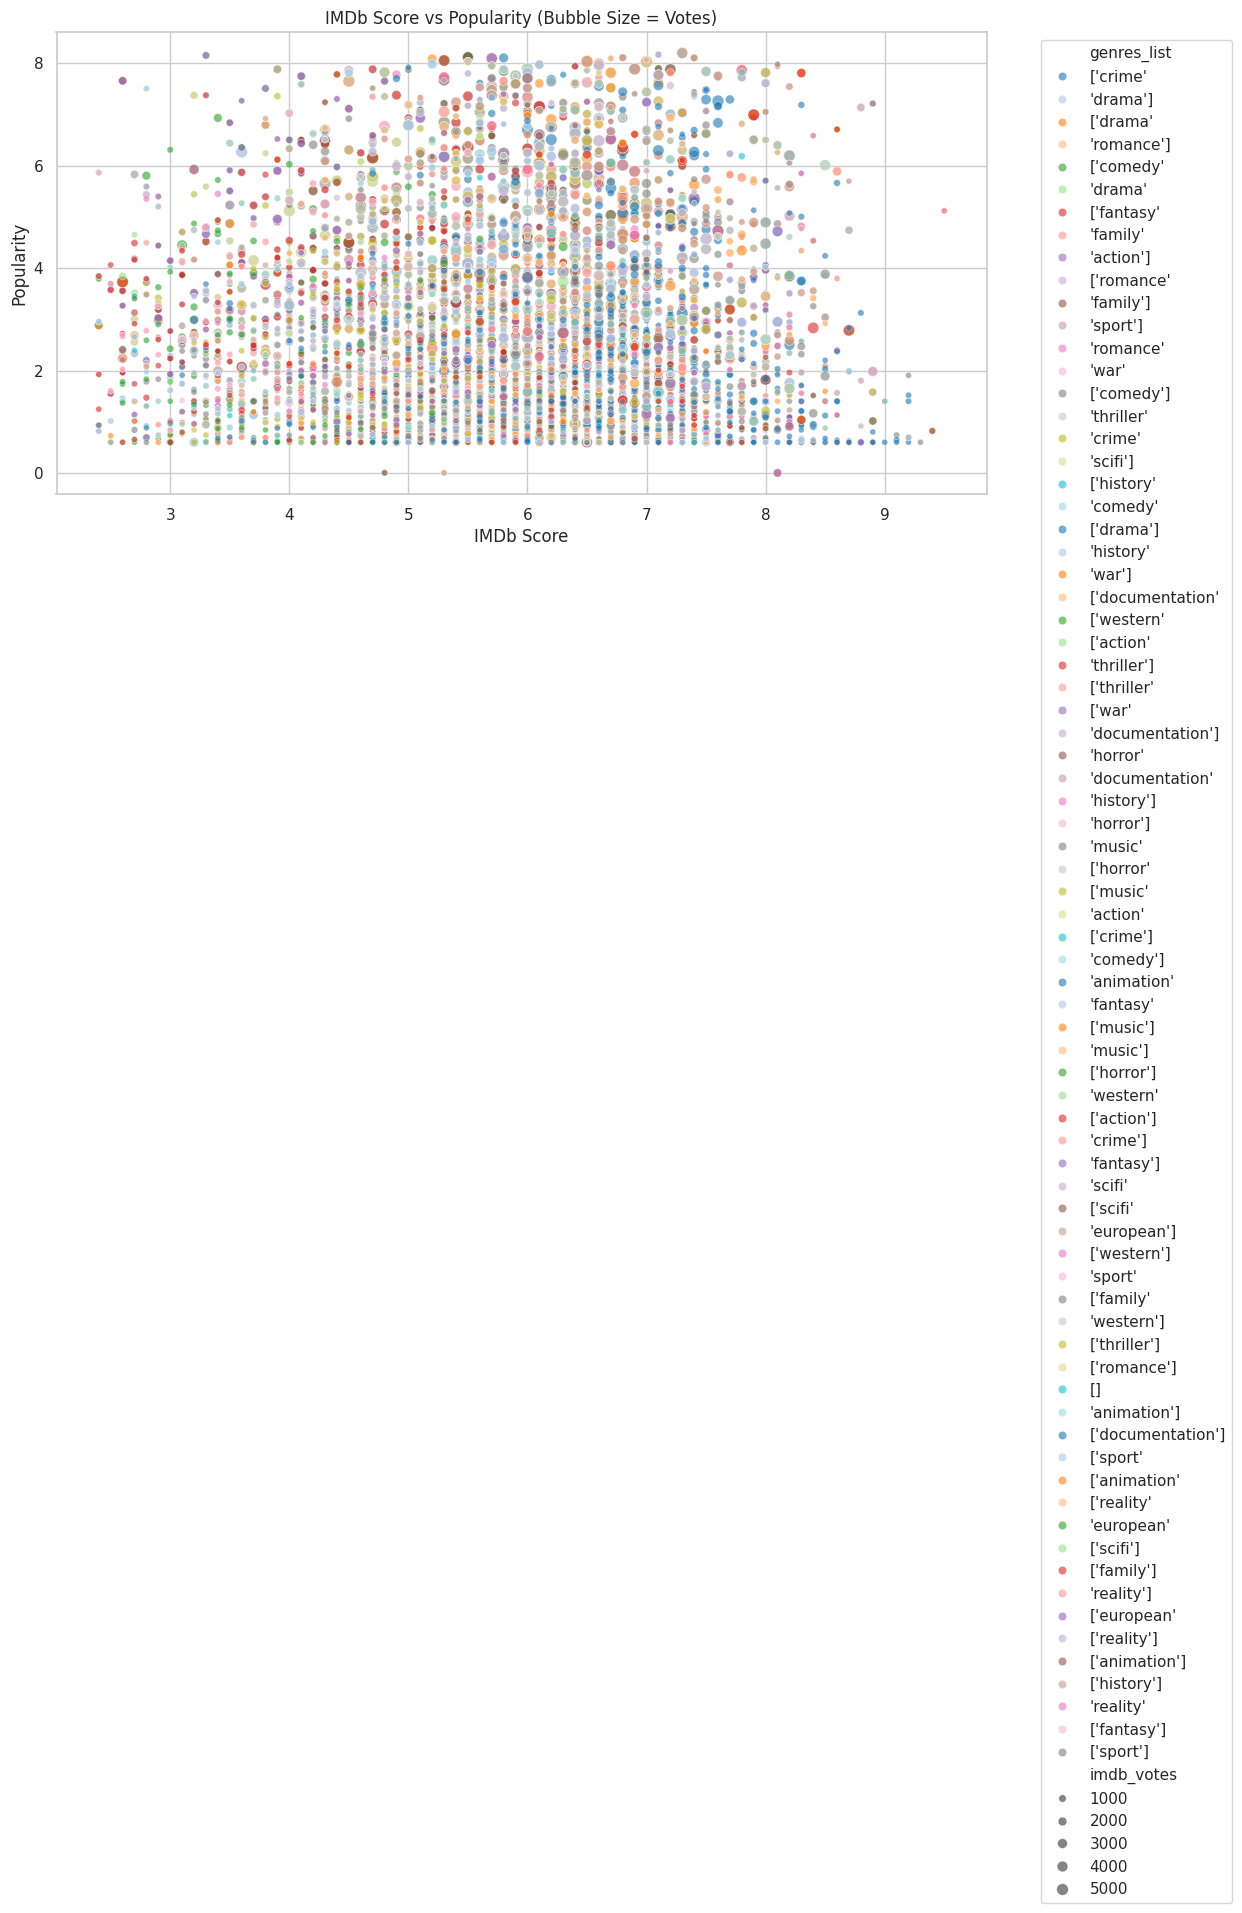

In [76]:
df_bubble = titles_df.explode("genres_list")

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_bubble,
    x="imdb_score",
    y="tmdb_popularity",
    size="imdb_votes",
    hue="genres_list",
    alpha=0.6,
    palette="tab20"
)

plt.title("IMDb Score vs Popularity (Bubble Size = Votes)")
plt.xlabel("IMDb Score")
plt.ylabel("Popularity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [77]:
print("Highest Rated Genre: ", genre_score.idxmax())
print("Most Popular Country: ", top_countries.idxmax())
print("Most Frequent Actor: ", top_actors.idxmax())
print("Most Frequent Director: ", top_directors.idxmax())


Highest Rated Genre:  ['sport']
Most Popular Country:  ['US']
Most Frequent Actor:  George 'Gabby' Hayes
Most Frequent Director:  Joseph Kane
